#### k-최근접 이웃 알고리즘
- 지도학습 알고리즘 중 하나
- 굉장히 직관적인고 간단한 알고리즘(주변 이웃이 많은것을 테스트값으로 도출)
 - 어떤 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본뒤 많은 데이터가 포함되어 있는 범주로 분류
- knn의 특징은 훈련이 따로 필요없다는 것.
 - 다른 모델들은 fit(X_train, y_train)의 코드를 통해 훈련을 시킨다. 즉, 훈련 데이터를 기반으로 모델을 만들고 테스트 데이터로 테스트하는 방식이지만, knn은 훈련데이터를 저장하는게 훈련의 전부이다.
- 모델을 별도로 구축하지 않아서 게으른 모델(Lazy model)이라 부른다.
- 모든 데이터를 가지고 있음.( 자료가 많다면 메모리를 많이 차지하고 시간이 걸림

### 필요한 패키지 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### 데이터 셋 로딩

In [3]:
# 도미의 관측 데이터 셋
## 생선의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
## 생선의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 
                475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
                575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
                920.0, 955.0, 925.0, 975.0, 950.0]

<function matplotlib.pyplot.show(close=None, block=None)>

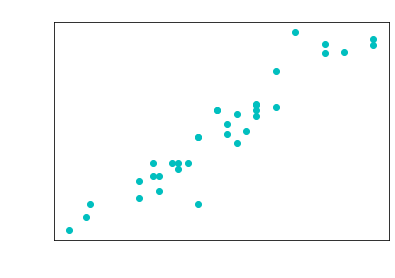

In [5]:
## feature 간의 관계를 시각화하는 scatter plot
# 길이를 x, 무게를 y
plt.scatter(bream_length, bream_weight, color='c')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('bream_ info')
plt.show()
# 양의 상관 관계를 가지고, 선형적이다.(직선의 형태와 유사함)
# --> 길이가 길수록 무게가 많이 나간다.

In [6]:
# 빙어의 관측 데이터 셋
## 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
## 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


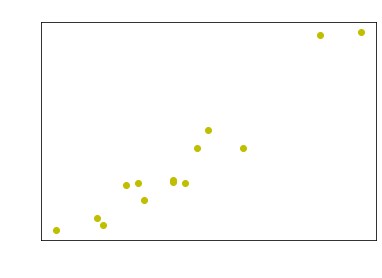

In [7]:
plt.scatter(smelt_length, smelt_weight, color='y')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('smelt_ info')
plt.show()
# 양의 상관관계를 나타내는것 처럼 보임

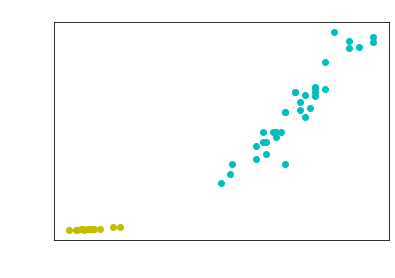

In [8]:
## 두개를 한번에 본다면?
plt.scatter(bream_length, bream_weight, color='c')
plt.scatter(smelt_length, smelt_weight, color='y')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('bream & smelt')
plt.show()


### 데이터 이해하기

In [9]:
# 머신러닝 패키지를 사용할 경우 특성들을 2차원 Numpy 배열로 만들어 줘야한다.
## 특성 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [10]:
# 2차원 배열을 생성하기 위한 zip()와 리스트내포
# zip(): 나열된 리스트에서 요소를 하나씩 꺼내주는 역할을 하는 함수
fish_data = [[l,w] for l, w in zip(length, weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [13]:
# 도미(타겟)을 1, 빙어를 0
## 머신에서 찾고자 하는 것에 1을 주고 나머지는 0으로
fish_target = [1] * 35 + [0] * 14 # 도미값이 35개, 빙어값이 14개 여서
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

#### KNN 알고리즘 : 2진 분류 알고리즘

In [18]:
# 필요 클래스 로딩(클래스 사용시 인스턴스 객체가 필요함)
from sklearn.neighbors import KNeighborsClassifier

# 인스턴스 객체 생성
knn = KNeighborsClassifier() # 파라미터 조정없이 기본값을 사용할 거임

# 훈련 - 모델에 데이터를 전달하여 규칙을 학습하는 과정
## 훈련시키는 것을 fit, 머시러닝 알고리즘을 이용한것 model
model = knn.fit(fish_data, fish_target) # fit(문제, 정답)

# 평가(정확도 검사), 맞출 확률(정답횟수/전체 *100)
model.score(fish_data, fish_target)
## 맞출 확률이 1.0 (100%)

1.0

In [19]:
# knn 학습모델 
knn.fit(fish_data, fish_target)

KNeighborsClassifier()

- 업버전 되기 전 결과 양식
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
                     
 p = 1(맨하튼), 2(뉴클리안), 디폴트가(2)
 weights='uniform' 가중치를 균등히 분포, dist면 거리에 따라 분포(조금 더 강력히)

In [20]:
# 예측 : 새로운 데이터를 추가하여 분류하는 작업
# 길이(무게) : 30(600) 인 데이터의 종류는?
knn.predict([[30,600]])
## 1, 도미

array([1])

In [ ]:
# 위 값을 시각화 하기 위한 
new_data = [30,600]

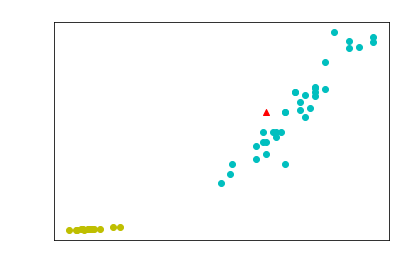

In [28]:
plt.scatter(bream_length, bream_weight, color='c')
plt.scatter(smelt_length, smelt_weight, color='y')
plt.scatter(30,600, marker ='^', color='r') # 여기는 '^r'이 안먹네
plt.plot()
plt.xlabel('length')
plt.ylabel('weight')
plt.title('bream & smelt')
plt.show()

In [29]:
model._fit_X # X가 데이터(fishData)

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [30]:
knn._fit_X
# 모델도 데이터를 다 가지고 있지만, knn(객체)도 다 가지고 있는걸 확인할 수 있다.

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [31]:
# 타겟 데이터
model._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [32]:
knn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [34]:
# k가 49라면?
## 모두 도미로 판단하겠지(35개 값이 도미니깐..!)
kn49 = KNeighborsClassifier(n_neighbors =49) # k인수 파라미터 설정
kn49.fit(fish_data, fish_target)
# 정확도
kn49.score(fish_data, fish_target)

0.7142857142857143

In [35]:
# 도미수 / 전체수
35/49

0.7142857142857143

### 훈련 데이터와 테스트 데이터

In [36]:
print(type(fish_data))
print(type(fish_target))

<class 'list'>
<class 'list'>


In [42]:
# 훈련데이터 35개, 테스트 데이터 14개로 분리하는 작업
## list타입이니깐 슬라이싱 활용
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [47]:
# 모델 작업
kn = KNeighborsClassifier() # 인스턴스 객체 생성
kn.fit(train_input, train_target) # 학습 
kn.score(test_input, test_target) # 정확성

# 샘플의 편향 때문에 0이 뜸
## 학습시킬때는 도미인데 타겟은 빙어이기때문에
# 그래서 이렇게 나누는게 아니라 넘파이배열을 이용하여 섞어준 후에 해당 과정을 거친다.

0.0

In [48]:
# 리스트를 numpy 배열로 만드는 작업
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [49]:
type(input_arr)

numpy.ndarray

In [51]:
target_arr.shape # 잘 만들어졌는지 크기 확인
input_arr.shape # 두 개의 관측값을 가지고 있음

(49, 2)

In [52]:
# 넘파이 배열 셔플
## 타겟과 인풋 데이터는 섞을떄, 같은 위치에 함께 선택되어야 한다
np.random.seed(42) # seed값 설정
index = np.arange(49) # 0~48까지의 인덱스 생성
## shuffle()
np.random.shuffle(index) # 넘파이 배열은 인덱스가 있으니깐 인덱스로 셔플을 해줄거임.

In [53]:
index # 섞인것 확인

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [54]:
trainS_input = input_arr[index[:35]]
trainS_target = target_arr[index[:35]]
testS_input = input_arr[index[35:]]
testS_target = target_arr[index[35:]]

In [55]:
input_arr[13], trainS_input[0]  # 셔플후 0번째가 섞기전 13번쨰 친구라서 셔플 확인

(array([ 32., 340.]), array([ 32., 340.]))

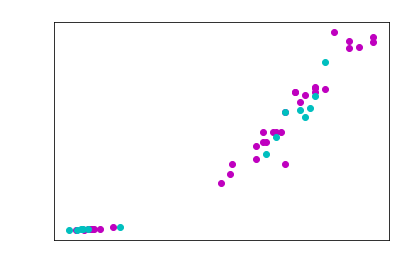

In [57]:
plt.scatter(trainS_input[:,0],trainS_input[:,1],color='m') # x축y축으로 담아야 해서 분리하는것
plt.scatter(testS_input[:,0], testS_input[:,1], color='c')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('ML')
plt.show()

In [59]:
kn = KNeighborsClassifier()
kn.fit(trainS_input, trainS_target)
kn.score(testS_input, testS_target)

1.0

#### 데이터 전처리(Data Preprocessing)

In [66]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [62]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [61]:
## 두 개의 컬럼을 묶어서 배열로
# column_stack() 
np.column_stack([[1,2,3],[4,5,6]])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [63]:
fish_data = np.column_stack([fish_length, fish_weight])
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [65]:
# np.zeros(), np.ones()
# concat, 이어서 붙여줌
fish_target = np.concatenate([np.ones(35), np.zeros(14)])
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### 훈련 데이터와 테스트 데이터 분리

In [68]:
from sklearn.model_selection import train_test_split

train_input, teat_input, train_target, test_target = train_test_split(\
                                                                     fish_data, fish_target, random_state=42)

In [72]:
print(train_input.shape, teat_input.shape)

(36, 2) (13, 2)


In [74]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [73]:
# stratify = 클래스 비율에 맞춰서 데이터를 분리하도록 조정하는 옵션
## 훈련 데이터가 적거나 특정 클래스의 샘플 개수가 적을 떄 유용하게 사용된다.
train_input, test_input, train_target, test_target = train_test_split(\
                                                                     fish_data, fish_target, stratify=fish_target, random_state=42)

In [75]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

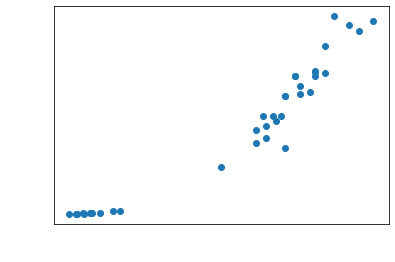

In [76]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [77]:
kn.predict([[25,150]])

array([0.])

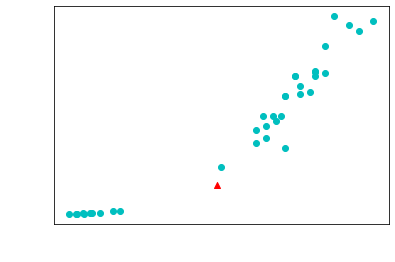

In [78]:
plt.scatter(train_input[:,0], train_input[:,1], color='c')
plt.scatter(25,150, marker='^', color='r')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [82]:
# kneighbors(): 이웃까지의 거리와 이웃의 샘플 인덱스를 반환하는 함수
distances, indexs = kn.kneighbors([[25,150]]) 

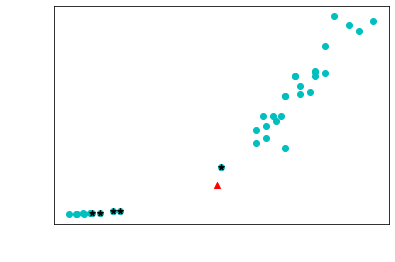

In [85]:
plt.scatter(train_input[:,0], train_input[:,1], color='c')
plt.scatter(25,150, marker='^', color='r')
plt.scatter(train_input[indexs,0], train_input[indexs,1], marker='*', color='k')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [86]:
train_input[indexs]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [87]:
train_target[indexs]

array([[1., 0., 0., 0., 0.]])

In [88]:
distances
# 130과 92인데 그래프상 차이가 큰걸 보니 거리단위의 차이가 큰걸 알수 있음..

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

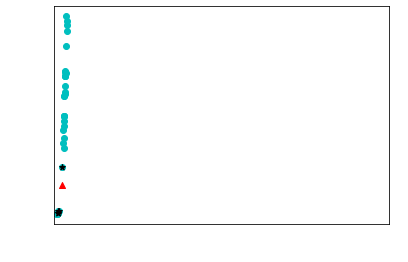

In [89]:
plt.scatter(train_input[:,0], train_input[:,1], color='c')
plt.scatter(25,150, marker='^', color='r')
plt.scatter(train_input[indexs,0], train_input[indexs,1], marker='*', color='k')
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# x축거리로는 영향을 느낄 수 없음(x축 보다는 y축의 영향이 더 크다)

#### 피쳐 스케일링
- 두특성의 스케일(scale)이 다를 때, 데이터를 표현하는 기준이 다르면 알고리즘이 올바를게 예측 할 수 없다.
 - 최소-최대 정규화(min-max normalization) :  X<sub>new</sub> = X-min(x)/max(x)-min(x)
 - z-점수 표준화(z-value standardzation) : X<sub>new</sub> = X-mean(x)/std(x) 

In [90]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [91]:
train_scaled = (train_input - mean) / std

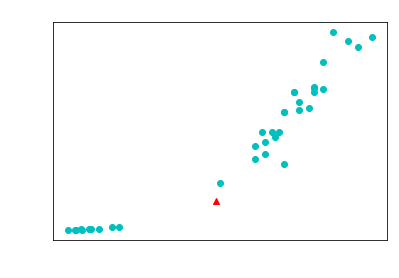

In [92]:
new = ([25,150] - mean) / std # 테스트 값도 스케일링을 거쳐야함
plt.scatter(train_scaled[:,0], train_scaled[:,1], color='c')
plt.scatter(new[0],new[1], marker='^', color='r')
plt.title('dataScaled')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [94]:
test_scaled = (test_input - mean) / std

In [98]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [99]:
kn.score(test_scaled, test_target)

1.0

In [100]:
kn.predict([new]) # 스케일 후 빙어판정을 받았다...

array([1.])

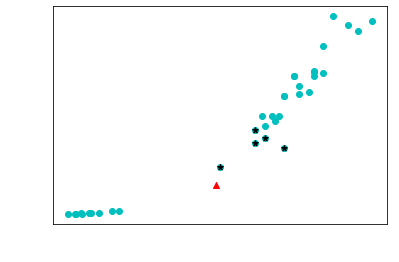

In [104]:
distances, indexs = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1], color='c')
plt.scatter(new[0],new[1], marker='^', color='r')
plt.scatter(train_scaled[indexs,0], train_scaled[indexs,1], marker='*', color='k')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 붓꽃(iris) 품종 분류 분석

#### Dataset로딩

In [107]:
from sklearn.datasets import load_iris
iris = load_iris()

In [108]:
# Bunch 클래스객체(파이썬 딕셔너리와 비슷)
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [138]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [109]:
# iris의 카 확인
print('iris의 키 : \n', iris.keys())

iris의 키 : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [110]:
print(iris['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [111]:
# 데이터프레임으로 변환하여 내용 확인
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype = 'category')
sy = sy.cat.rename_categories(iris.target_names) # 값 이름 변경(0,1,2로된걸 세토사..)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [114]:
iris.data.shape , iris.target.shape

((150, 4), (150,))

#### step1. 훈련데이터와 테스트데이터 분리
- 훈련 데이터(훈련셋) : 머신러닝 모델을 만들 때 사용
- 테스트 데이터(테스트세트, 홀드아웃 세트) : 모델이 얼마나 잘 작동하는 지 측정하는데 사용

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
                                                   random_state=0)

In [116]:
print('X_train 크기 :', X_train.shape)
print('y_train 크기 :', y_train.shape)

X_train 크기 : (112, 4)
y_train 크기 : (112,)


In [118]:
print('X_test 크기 :', X_test.shape)
print('y_test 크기 :', y_test.shape)

X_test 크기 : (38, 4)
y_test 크기 : (38,)


#### step2. 데이터 특성 파악
- scatter plot 
- 산점도 행렬

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

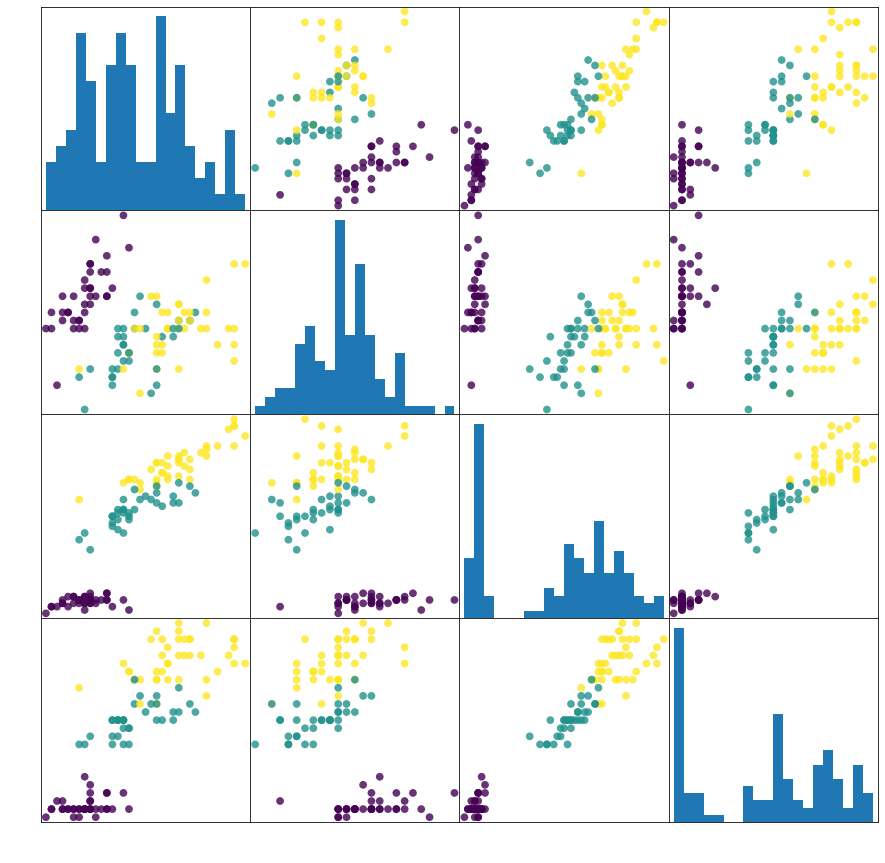

In [120]:
# 판다스가 제공하는 시각화
## 자기 자신과의 관계는 히스토그램으로 나타남 그 속성(hist_kwd)
iris_df = pd.DataFrame(X_train, columns = iris.feature_names)

pd.plotting.scatter_matrix(iris_df, c =y_train, figsize=(15,15), marker='o',
                          hist_kwds={'bins':20}, s = 60, alpha = .8)

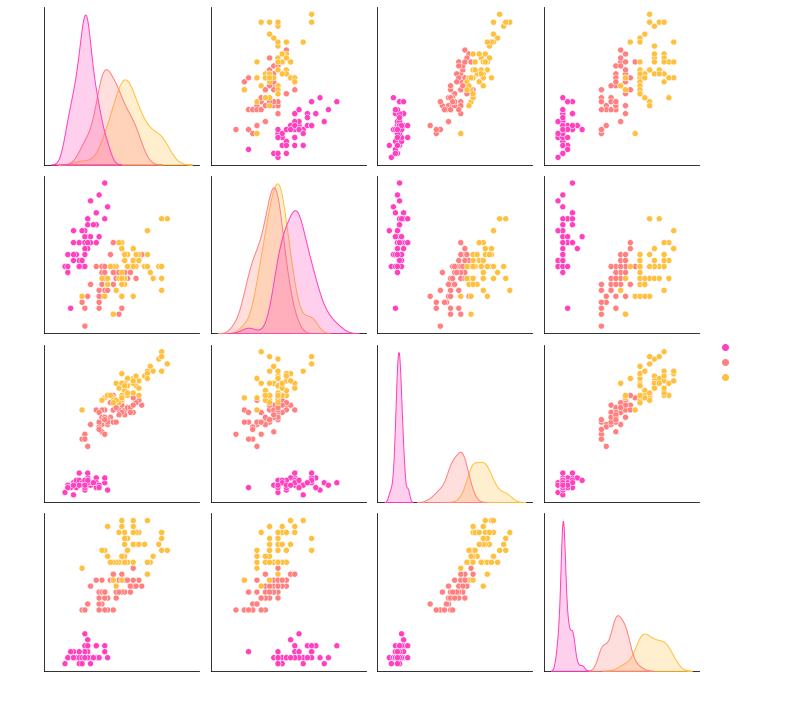

In [122]:
import seaborn as sns
sns.pairplot(df, hue='species', palette = 'spring')

#### knn 최근접 이웃 알고리즘( 단점 : 적절한 k의 선택이 必)
- k가 너무 小 : Overfitting(과대적합)
- k가 너무 多 : Underfitting(과소적합)
- 모델이 복잡할 수록 훈련데이터에 대해서는 더 정확하게 예측한다.
- 우리가 찾으려는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델이다.

In [123]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=ce551ae8a1ec52bc5ac9996a57e162b93b83d6e264ecbc2df6e0e90ed312f0fe
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


In [124]:
import mglearn

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =1) # 최근접 이웃을 1로하는 인스턴스객체

In [126]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [127]:
print('훈련세트의 정확도 : {:.2f}'.format(knn.score(X_train, y_train)))

훈련세트의 정확도 : 1.00


#### 예측하기

In [128]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new의 크기 :', X_new.shape)

X_new의 크기 : (1, 4)


In [129]:
prediction = knn.predict(X_new)
print('예측 :', prediction)
print('예측한 타깃 이름 :', iris['target_names'][prediction])

예측 : [0]
예측한 타깃 이름 : ['setosa']


#### 모델 평가하기

In [130]:
# 결과
y_pred = knn.predict(X_test)

In [131]:
print('테스트세트의 예측값 :\n', y_pred)

테스트세트의 예측값 :
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [132]:
# 위의 예측값을 names로 보기 위한 for문
for i in range(0, len(y_pred)):
    yhat = y_pred[i]
    print('{} : {}'.format(X_test[i],iris['target_names'][yhat]))


[5.8 2.8 5.1 2.4] : virginica
[6.  2.2 4.  1. ] : versicolor
[5.5 4.2 1.4 0.2] : setosa
[7.3 2.9 6.3 1.8] : virginica
[5.  3.4 1.5 0.2] : setosa
[6.3 3.3 6.  2.5] : virginica
[5.  3.5 1.3 0.3] : setosa
[6.7 3.1 4.7 1.5] : versicolor
[6.8 2.8 4.8 1.4] : versicolor
[6.1 2.8 4.  1.3] : versicolor
[6.1 2.6 5.6 1.4] : virginica
[6.4 3.2 4.5 1.5] : versicolor
[6.1 2.8 4.7 1.2] : versicolor
[6.5 2.8 4.6 1.5] : versicolor
[6.1 2.9 4.7 1.4] : versicolor
[4.9 3.6 1.4 0.1] : setosa
[6.  2.9 4.5 1.5] : versicolor
[5.5 2.6 4.4 1.2] : versicolor
[4.8 3.  1.4 0.3] : setosa
[5.4 3.9 1.3 0.4] : setosa
[5.6 2.8 4.9 2. ] : virginica
[5.6 3.  4.5 1.5] : versicolor
[4.8 3.4 1.9 0.2] : setosa
[4.4 2.9 1.4 0.2] : setosa
[6.2 2.8 4.8 1.8] : virginica
[4.6 3.6 1.  0.2] : setosa
[5.1 3.8 1.9 0.4] : setosa
[6.2 2.9 4.3 1.3] : versicolor
[5.  2.3 3.3 1. ] : versicolor
[5.  3.4 1.6 0.4] : setosa
[6.4 3.1 5.5 1.8] : virginica
[5.4 3.  4.5 1.5] : versicolor
[5.2 3.5 1.5 0.2] : setosa
[6.1 3.  4.9 1.8] : virginica
[6

In [133]:
print('테스트 데이터의 정확도 : {:.2f}'.format(knn.score(X_test, y_test)))

테스트 데이터의 정확도 : 0.97


In [134]:
# 위와 같은 말
print('테스트 데이터의 정확도 : {:.2f}'.format(np.mean(y_pred == y_test)))

테스트 데이터의 정확도 : 0.97


- 사이킷런 패키지 metrics 서브패키지에서 다음처럼 다양한 분류용 성능평가 명령을 제공함
1. confusion_matrix(y_true, y_pred)
2. accuracy_score(y_true, y_pred) 정확도
3. recall_score(y_true, y_pred)예측점수
4. fbeta_score(y_true, y_pred, beta)
5. f1_score(y_true, y_pred)
6. classfication_report(y_true, y_pred)
7. roc_curve
8. auc


#### 최적의 k값 찾기

In [135]:
from sklearn.metrics import accuracy_score

# 1~100까지 k값 대입
ks = 100
mean_acc = np.zeros((ks-1)) # 2차원 배열로 만드려구

for k in range(1, ks):
    clf = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[k-1] = accuracy_score(y_test, yhat)
print(mean_acc)

[0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.94736842
 0.94736842 0.94736842 0.94736842 0.92105263 0.89473684 0.94736842
 0.94736842 0.97368421 0.92105263 0.94736842 0.92105263 0.94736842
 0.92105263 0.92105263 0.92105263 0.86842105 0.89473684 0.86842105
 0.86842105 0.89473684 0.89473684 0.89473684 0.89473684 0.86842105
 0.89473684 0.89473684 0.89473684 0.86842105 0.92105263 0.89473684
 0.89473684 0.89473684 0.89473684 0.89473684 0.89473684 0.89473684
 0.89473684 0.89473684 0.81578947 0.81578947 0.81578947 0.84210526
 0.84210526 0.84210526 0.71052632 0.68421053 0.65789474 0.63157895
 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895
 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895
 0.60526316 0.60526316 0.60526316 0.60526316 0.60526316 0.6052

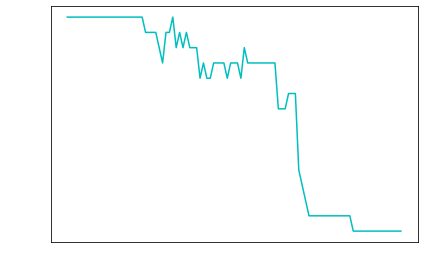

In [137]:
# 시각화
plt.plot(range(1,ks), mean_acc, 'c')
plt.xlabel('Number of Neighbors(k)')
plt.ylabel('Accuracy')
plt.tight_layout() ## ??
plt.show()